In [71]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 1, 10)
y = 3 * x + 2
points = zip(x, y)

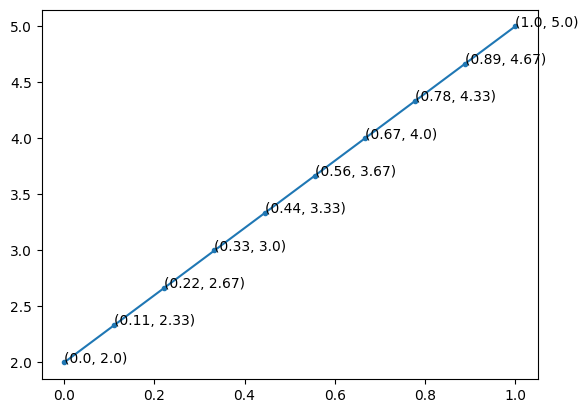

In [72]:

plt.plot(x, y, marker='.')
for p in points:
    plt.annotate(f"({round(p[0], 2)}, {round(p[1], 2)})", xy=(p[0], p[1]))

In [73]:
from typing import List
import numpy as np
def get_circle_points(radius: float, center: tuple, n_samples=10) -> List[tuple]:
    theta = np.linspace(0, 2*np.pi, n_samples)
    x = radius * np.cos(theta) + center[0]
    y = radius * np.sin(theta) + center[1]
    return list(x), list(y)

<Axes: xlabel='x', ylabel='y'>

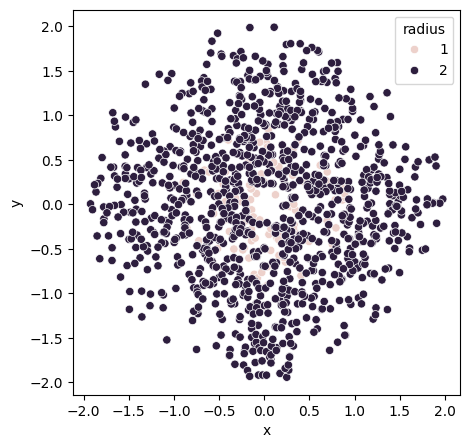

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

randomizer_param = 0.9

x1, x2 = get_circle_points(1, (0,0), n_samples=100)
x1 = [x * (1 - np.random.rand()*randomizer_param) for x in x1]
x2 = [x * (1 - np.random.rand()*randomizer_param) for x in x2]
y12 = [1] * len(x1)
x3, x4 = get_circle_points(2, (0, 0), n_samples=1000)
x3 = [x * (1 - np.random.rand()*randomizer_param) for x in x3]
x4 = [x * (1 - np.random.rand()*randomizer_param) for x in x4]
y34 = [2] * len(x3)

df = pd.DataFrame({
    'x': x1 + x3,
    'y': x2 + x4,
    'radius': y12 + y34
})

plt.figure(figsize=(5, 5))
sns.scatterplot(x=df['x'], y=df['y'], hue=df['radius'])

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = df[['x', 'y']]
y = df['radius']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_model = LogisticRegression()
scaler = StandardScaler()
poly_model = PolynomialFeatures(degree=2, include_bias=True)

l1_ratios = np.linspace(0, 1, 16)
c_values = [100, 10, 1, 0.1, 0.01]
class_weights = [{1: w1, 2: w2} for w1 in [100, 10, 1] for w2 in [100, 10, 1]]

params=dict(l1_ratio=l1_ratios, C=c_values, class_weight=class_weights)

grid_model = GridSearchCV(estimator=lin_model, param_grid=params, scoring='precision', cv=5, n_jobs=-1, verbose=3)

model = Pipeline(steps=[
    ('scaler', scaler),
    ('poly', poly_model),
    ('grid model', grid_model)
])

model.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.0s[CV 3/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.0s

[CV 4/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 1/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 5/5

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 100, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 100

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=100, class_weight={1: 10, 2: 100}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 10, 2: 100}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 10, 2: 100}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 10, 2: 100}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 10, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 10, 2: 100}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 10, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=100,

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.0;, score=0.000 total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 1

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=100, class_weight={1: 10, 2: 1}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 10, 2: 10}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 10, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 10, 2: 1}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 10, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 10, 2: 1}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 10, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 10, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 10, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 10, 2: 1}, l1_ratio=0.53333

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 4/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4/5] 

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 3/5] END C=100, class_weight={1: 1, 2: 100}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.0;, score=0.000 total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.3333333333333333;

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 1, 2: 10}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 1/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.0;, score=0.000 total tim

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 3/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 100, 2: 100}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 100, 2: 100}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight={1: 100, 2: 100}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 100, 2: 100}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=100, class_weight={1: 1, 2: 1}, l1_ratio=0.93

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV 3/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 100, 2: 10}, l1_ratio=0.7333333333333

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 3/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s[CV 2/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.8;, score=nan total time=   0.0s

[CV 5/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight={1: 10, 2: 100}, l1_ratio=0.8;, score=n

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 2/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 2/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s[CV 3/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.4;, score=nan total time=   0.0s

[CV 3/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=0.4;, score=nan total

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



[CV 5/5] END C=10, class_weight={1: 10, 2: 1}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 10, 2: 1}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 10, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 10, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 10, 2: 10}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 10, 2: 1}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s[CV 3/5] END C=10, class_weight={1: 10, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s

[CV 4/5] END C=10, class_weight={1: 10, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 10, 2: 1}, l1_ratio=0.2;, score=nan total time=   

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 3/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 1, 2: 100}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 3/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.4;, score=nan total time=   0.2s
[CV 3/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.6666666666666666;, score=nan to

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 4/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.0;, score=0.000 total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 1, 2: 10}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 4/5] END 

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 1/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.0;, score=0.000 total time=   0.0s
[CV 1/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.0;, score=0.000 total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.0;, score=0.000 total time=   0.0s
[CV 5/5] END C=10, class_weight={1: 1, 2: 1}, l1_ratio=0.7333333333333333;, score=nan total ti

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=1, class_weight={1: 100, 2: 100}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight={1: 100, 2: 100}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 100, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 100, 2: 100}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight={1: 100, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight={1: 100, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 100, 2: 100}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight={1: 100, 2: 100}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight={1: 100, 2: 100}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 100, 2: 

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV 2/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s[CV 4/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s

[CV 1/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.0;, score=0.237 total time=   0.1s
[CV 1/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s[CV 5/5] END C=1, class_weight={1: 100, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 4/5] END C=1, c

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 1/5] END C=1, class_weight={1: 10, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight={1: 10, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight={1: 10, 2: 10}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 10, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight={1: 10, 2: 10}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 10, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 10, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 10, 2: 10}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 10, 2: 10}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight={1: 10, 2

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 1/5] END C=1, class_weight={1: 10, 2: 1}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 10, 2: 10}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 10, 2: 1}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s[CV 5/5] END C=1, class_weight={1: 10, 2: 1}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight={1: 10, 2: 1}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight={1: 10, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 10, 2: 1}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 10, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s

[CV 1/5] END C=1, class_weight={1: 10, 2: 1}, l1_ratio=0.0;, score=0.237 total time=   0.1s
[CV 3/5] END C=1, class_weight={1: 10, 2: 1}, l1_ratio=0.333333

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 3/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 4/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight={1: 1, 2: 100}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 5/5] END 

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 1/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.1s
[CV 2/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4/5] END C=1, clas

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 4/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight={1: 1, 2: 1}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 3/5] END C=0.1, class_weight={1: 100, 2: 100}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 100, 2: 100}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 100, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight={1: 100, 2: 100}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 100, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight={1: 100, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 100, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 100, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 1/5] END C=0.1, class_weight={1: 100, 2: 100}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 100, 2: 100}, 

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV 5/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s[CV 1/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.0;, score=0.237 total time=   0.0s

[CV 3/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight={1: 100, 2: 10}, l1_ratio=0.26666666666666

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=0.1, class_weight={1: 10, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 1/5] END C=0.1, class_weight={1: 10, 2: 10}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 1/5] END C=0.1, class_weight={1: 10, 2: 100}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight={1: 10, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.1s
[CV 3/5] END C=0.1, class_weight={1: 10, 2: 100}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 10, 2: 100}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight={1: 10, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight={1: 10, 2: 100}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight={1: 10, 2: 100}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 10, 2: 100}, l1_ratio=0.86666666666666

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



[CV 5/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=1.0;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s[CV 4/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=0.8;, score=nan total time=   0.0s

[CV 3/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=0.0;, score=0.214 total time=   0.1s
[CV 3/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 10, 2: 1}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 4/5] END C=0.

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight={1: 1, 2: 100}, l1_ratio=0.4;, score=nan total time=

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 3/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s[CV 4/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s

[CV 2/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 1/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 1, 2: 10}, 

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 4/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight={1: 1, 2: 1}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight={1: 1, 2: 1}

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 


[CV 2/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 100, 2: 100}, l1_ratio=0.0;, score=0.000 total time=

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV 4/5] END C=0.01, class_weight={1: 100, 2: 1}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 100, 2: 10}, l1_ratio=0.9333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, class_weight={1: 100, 2: 1}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 100, 2: 10}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 100, 2: 1}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 100, 2: 10}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 100, 2: 1}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 100, 2: 1}, l1_ratio=0.13333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 100, 2: 10}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s[CV 5/5]

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=0.01, class_weight={1: 10, 2: 100}, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 10, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 10, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 10, 2: 100}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 10, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 10, 2: 100}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 10, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight={1: 10, 2: 100}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight={1: 10, 2: 100}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, 

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 1/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.0;, score=0.239 total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.5333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight={1: 10, 2: 1}, l1_ratio=0.266666666

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 5/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.1s
[CV 5/5] END C=0.01, class_weight={1: 1, 2: 100}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 3/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 1, 2: 100}, l1_ratio=0.06666666666666667;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.3333333333333333;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, class_weight={

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 3/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.1s
[CV 3/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.0;, score=0.000 total time=   0.1s
[CV 4/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.9333333333333333;, score=nan total time=   0.1s[CV 5/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.8;, score=nan total time=   0.0s

[CV 1/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 1, 2: 10}, l1_ratio=0.8666666666666667;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, cl

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

[CV 2/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.4666666666666667;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.26666666666666666;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.6666666666666666;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.7333333333333333;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight=

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
3375 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to 


[CV 3/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=0.9333333333333333;, score=nan total time=   0.1s[CV 4/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=1.0;, score=nan total time=   0.0s

[CV 5/5] END C=0.01, class_weight={1: 1, 2: 1}, l1_ratio=1.0;, score=nan total time=   0.0s


/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1137: UserWarning: One or more of the test scores are non-finite: [0.                nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.24115259        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.18443757        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.                nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.                nan
        nan        nan        nan        nan        nan        nan
    

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('poly', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [76]:

print(model.named_steps['grid model'].best_params_)
print(model.named_steps['grid model'].best_score_)

{'C': 1, 'class_weight': {1: 10, 2: 1}, 'l1_ratio': np.float64(0.0)}
0.24375392341494034


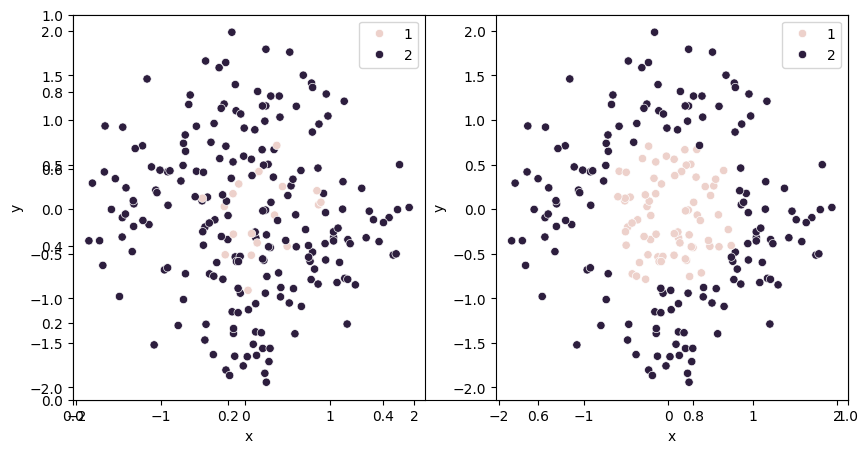

In [77]:
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test['x'], y=X_test['y'], hue=y_test)
plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['x'], y=X_test['y'], hue=model.predict(X_test))
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.20      0.74      0.31        19
           2       0.97      0.72      0.82       201

    accuracy                           0.72       220
   macro avg       0.58      0.73      0.57       220
weighted avg       0.90      0.72      0.78       220

